# The Python Notebook with codes for Analysis and Data Viz


# IMPORT THE DATA

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np

Define functions or classes if needed

In [2]:
 # Read dataset into a pandas DataFrame
    
dataset = pd.read_csv("Recruitment_Data.csv")

In [3]:
dataset

,attrition,performance_rating,sales_quota_pct,recruiting_source
0,1,3,1.088190,Applied Online
1,0,3,2.394173,NaN
2,1,2,0.497530,Campus
3,0,2,2.513958,NaN
4,0,3,1.424789,Applied Online
...,...,...,...,...
441,0,3,1.627813,Campus
442,1,4,0.689682,Referral
443,0,4,1.196198,NaN
444,0,4,1.598213,Applied Online


In [4]:
# Display basic information about the dataset

print("Dataset Information:")
print(dataset.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 0 to 445
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   attrition           446 non-null    int64  
 1   performance_rating  446 non-null    int64  
 2   sales_quota_pct     446 non-null    float64
 3   recruiting_source   241 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 14.1+ KB
None


Function for numeric computations def perform_numeric_computations(data): Perform numeric computations on the dataset.

In [5]:
dataset.shape

(446, 4)

In [6]:
dataset.describe()

,attrition,performance_rating,sales_quota_pct
count,446.000000,446.000000,446.000000
mean,0.213004,2.894619,1.082607
std,0.409891,0.683755,0.710042
min,0.000000,1.000000,-0.710827
25%,0.000000,2.000000,0.584444
50%,0.000000,3.000000,1.070143
75%,0.000000,3.000000,1.532488
max,1.000000,5.000000,3.666740


# Groupings the dataset 

In [7]:
# Grouping the data based on a categorical column, e.g., 'recruiting_source'
grouped_data = dataset.groupby('recruiting_source')

In [8]:
dataset.isna().sum()

attrition               0
performance_rating      0
sales_quota_pct         0
recruiting_source     205
dtype: int64

In [9]:
#Checking the unique values in recruitment_source column where we have missing values
dataset['recruiting_source'].unique()

array(['Applied Online', nan, 'Campus', 'Referral', 'Search Firm'],
      dtype=object)

In [10]:
#Checking if the dataset contains duplicate values
dataset.duplicated().sum()

0

In [11]:
missing_perct=round(dataset['recruiting_source'].isna().sum()/len(dataset)*100)
print(f"There is  {missing_perct}% data missing from recruiting_source")

There is  46% data missing from recruiting_source


 Imputing the missing values with knn bfill or summary statistics is a good option
 
 My intution is these missing data has been recorded and have no association with other catgories
 
 Here i think that as 46 % of values are missing there is a higher chance of underfitting and bias(noise)
 
 I will be imputing these mssing values as Walk in or direct interviews which make
 

In [12]:
#Lets Take NA values as Walk In
dataset.fillna("Walk In",inplace=True)

In [13]:
#Before Removing the Na values leets group the dataset with the NA values present and see if it checks out
grouped=dataset.groupby("recruiting_source").agg(
    total_attrition=("attrition","sum"),
    total_recruites=("attrition","count"),
    average_sales=("sales_quota_pct","mean")
).reset_index()
grouped['average_attrition']=round(grouped['total_attrition']/grouped['total_recruites']*100,2)

In [14]:
'''
*Most of the recruits by the company is Walkin followed by online recurits
*These Walk In in hires also have the highest averge_sales followed by online recurits
*Walk In interviews have the most less average attrition followed by online recuits
'''
#We will sort the dataframe to find the recuriting_source with lowest attrition  rate and high average sales
grouped.sort_values(by=["average_sales","average_attrition"],ascending=[0,1])

,recruiting_source,total_attrition,total_recruites,average_sales,average_attrition
4,Walk In,27,205,1.168109,13.17
0,Applied Online,32,130,1.058590,24.62
2,Referral,15,45,1.023198,33.33
1,Campus,16,56,0.908035,28.57
3,Search Firm,5,10,0.886960,50.00


# Numeric Computations

In [15]:
# Compute mean, median, and sum for numeric columns within each group
computed_results = grouped_data.agg({
        'attrition': 'mean',
        'performance_rating': ['mean', 'median', 'sum'],
        'sales_quota_pct': ['mean', 'median', 'sum']
}).reset_index()

In [16]:
computed_results

recruiting_source attrition performance_rating             sales_quota_pct  \
                         mean               mean median  sum            mean   
0    Applied Online  0.246154           2.930769    3.0  381        1.058590   
1            Campus  0.285714           2.928571    3.0  164        0.908035   
2          Referral  0.333333           2.844444    3.0  128        1.023198   
3       Search Firm  0.500000           2.700000    3.0   27        0.886960   
4           Walk In  0.131707           2.882927    3.0  591        1.168109   

                         
     median         sum  
0  1.035413  137.616724  
1  0.918977   50.849983  
2  0.982009   46.043918  
3  1.276763    8.869603  
4  1.204520  239.462374

In [17]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize Attrition differences by Recruiting Source

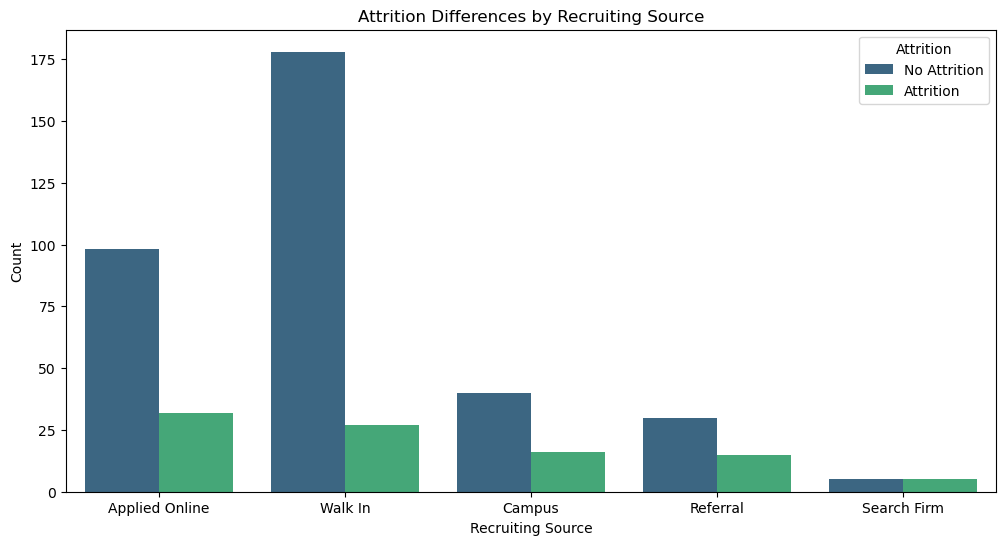

In [18]:
# Create a bar plot
plt.figure(figsize=(12, 6))
sns.countplot(x='recruiting_source', hue='attrition', data=dataset, palette='viridis')
    
    # Add labels and title
plt.xlabel('Recruiting Source')
plt.ylabel('Count')
plt.title('Attrition Differences by Recruiting Source')
    
    # Show legend
plt.legend(title='Attrition', loc='upper right', labels=['No Attrition', 'Attrition'])
    
    # Show the plot
plt.show()

# Attrition by Recruiting Sources

Attrition by Recruiting Sources: 
The best recruiting sources are those with the lowest attrition rates.

In this case, the missing data had the lowest attrition rates, which we consider to be direct or walk-in recruits.

The next best options are online and campus recruitment. 

The worst recruiting source is a search firm. Referalls, followed by search firms, have the highest attrition rates.

Text(0, 0.5, 'Average_Attrition')

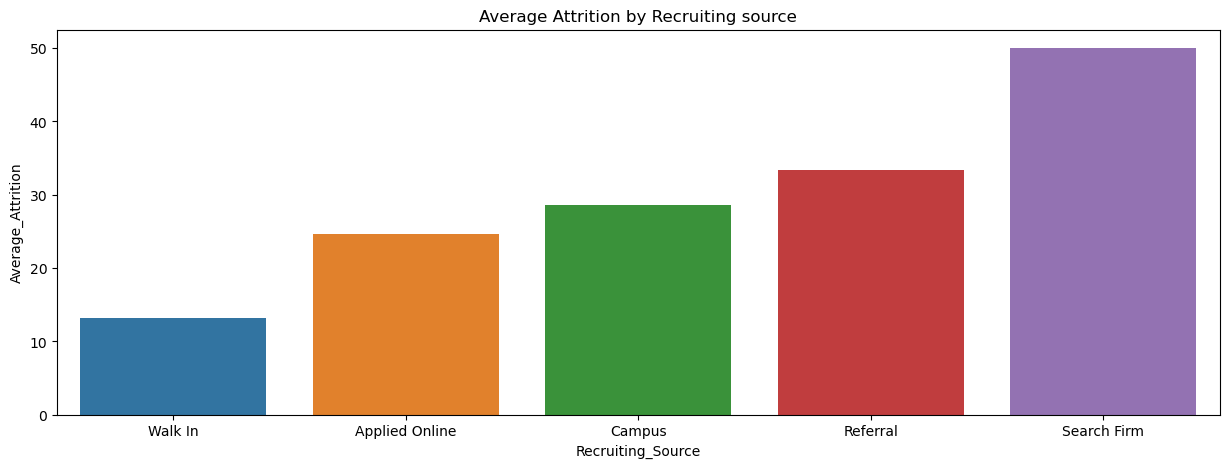

In [20]:
import seaborn as sn
plt.figure(figsize=(15,5))
sn.barplot(data=grouped,x="recruiting_source",y="average_attrition",
          order=grouped.sort_values("average_attrition").recruiting_source)
plt.title("Average Attrition by Recruiting source")
plt.xlabel("Recruiting_Source")
plt.ylabel("Average_Attrition")

# Visualize Sales differences by Recruiting Source

C:\Users\HP\AppData\Local\Temp\ipykernel_22292\2604267570.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='recruiting_source', y='sales_quota_pct', data=dataset, ci=None, palette='Set2')


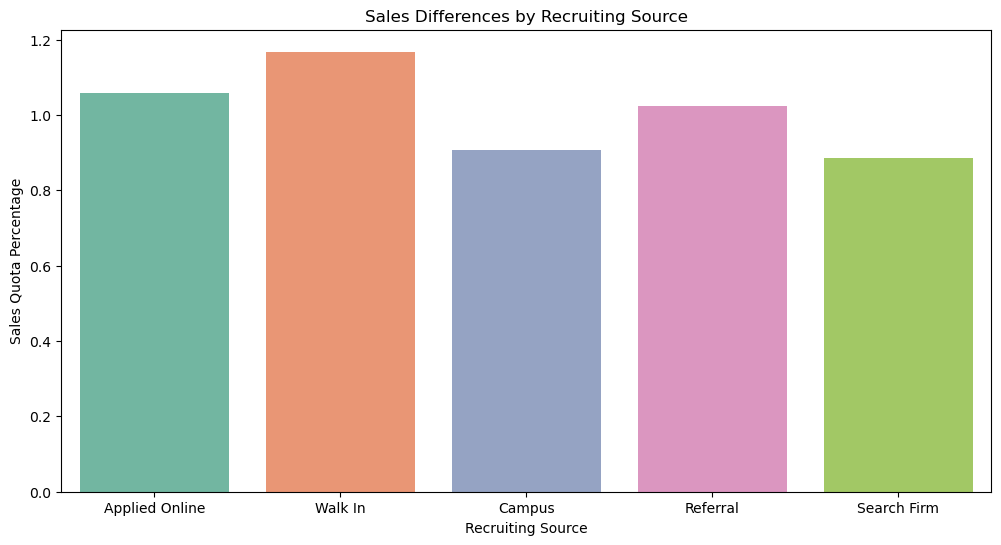

In [21]:
 # Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='recruiting_source', y='sales_quota_pct', data=dataset, ci=None, palette='Set2')
    
    # Add labels and title
plt.xlabel('Recruiting Source')
plt.ylabel('Sales Quota Percentage')
plt.title('Sales Differences by Recruiting Source')
    
    # Show the plot
plt.show()

# Average_sales by Recruiting Sources

Text(0, 0.5, 'Average_Sales')

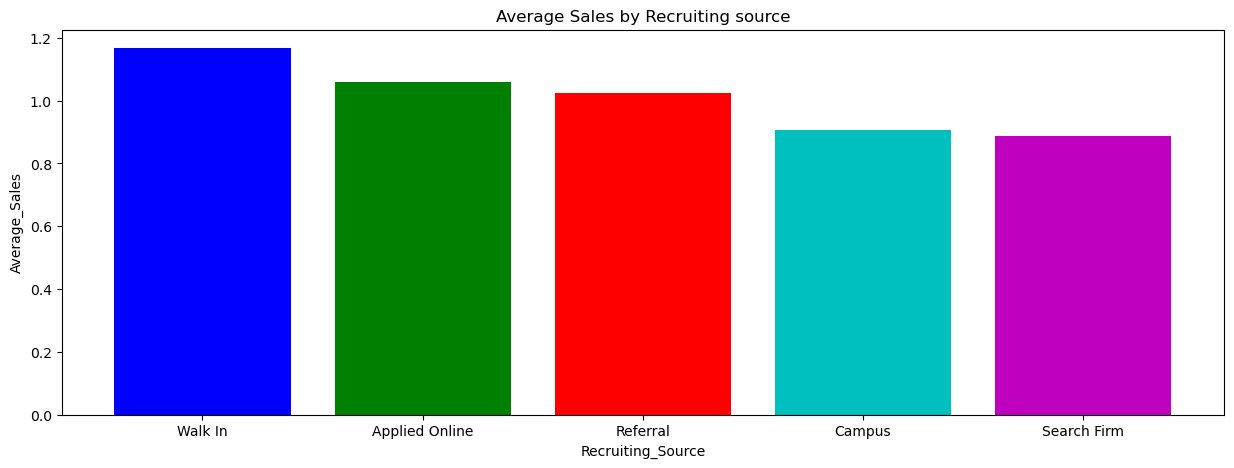

In [22]:
grouped_sorted = grouped.sort_values("average_sales",ascending=False)
plt.figure(figsize=(15,5))
plt.bar(grouped_sorted['recruiting_source'],grouped_sorted['average_sales'],color=["b","g","r","c","m"])
plt.title("Average Sales by Recruiting source")
plt.xlabel("Recruiting_Source")
plt.ylabel("Average_Sales")

# Visualizing the Employee Attrition Rate.

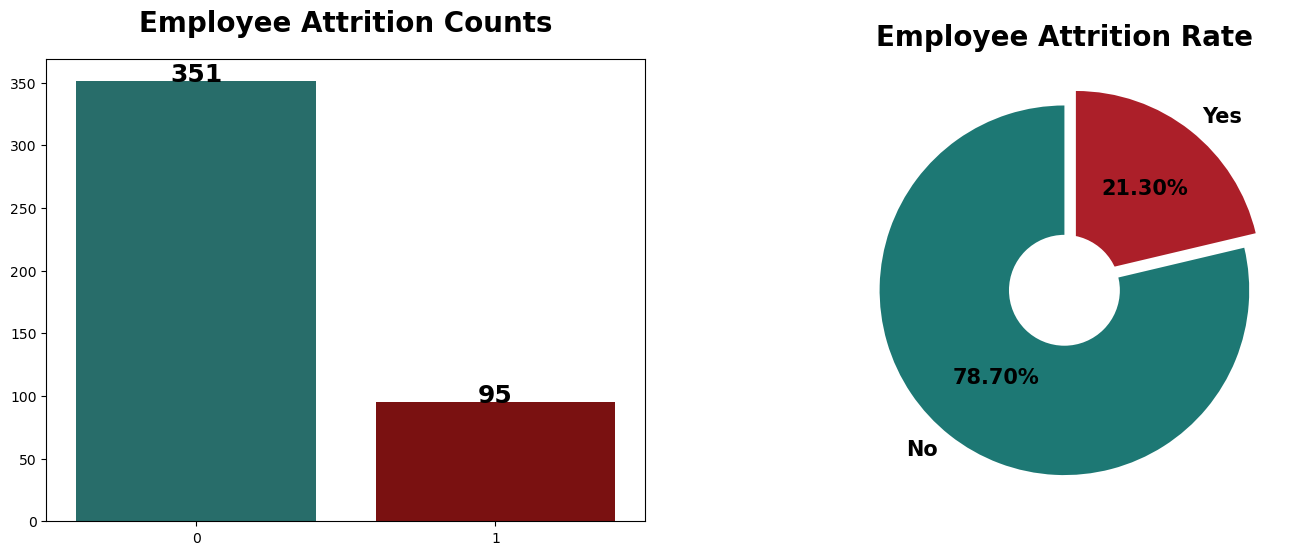

In [23]:
#Visualization to show Employee Attrition in Counts.
plt.figure(figsize=(17,6))
plt.subplot(1,2,1)
attrition_rate = dataset["attrition"].value_counts()
sns.barplot(x=attrition_rate.index,y=attrition_rate.values,palette=["#1d7874","#8B0000"])
plt.title("Employee Attrition Counts",fontweight="black",size=20,pad=20)
for i, v in enumerate(attrition_rate.values):
    plt.text(i, v, v,ha="center", fontweight='black', fontsize=18)

#Visualization to show Employee Attrition in Percentage.
plt.subplot(1,2,2)
plt.pie(attrition_rate, labels=["No","Yes"], autopct="%.2f%%", textprops={"fontweight":"black","size":15},
        colors = ["#1d7874","#AC1F29"],explode=[0,0.1],startangle=90)
center_circle = plt.Circle((0, 0), 0.3, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("Employee Attrition Rate",fontweight="black",size=20,pad=10)
plt.show()

💬 Inference:
1. The employee attrition rate of this organization is 21.30%.
2. According to experts in the field of Human Resources, says that the attrition rate 4% to 6% is normal in organization.
3. So we can say the attrition rate of the organization is at a dangerous level.
4. Therefore the organization should take measures to reduce the attrition rate

# THE END